/content/drive/MyDrive/datasets/dataset/normal: 100%|██████████| 1074/1074 [00:00<00:00, 2146.06it/s]
/content/drive/MyDrive/datasets/dataset/diabetic_retinopathy: 100%|██████████| 1098/1098 [00:00<00:00, 2010.59it/s]


                                               image  disease_type
0  /content/drive/MyDrive/datasets/dataset/catara...             1
1  /content/drive/MyDrive/datasets/dataset/catara...             1
2  /content/drive/MyDrive/datasets/dataset/normal...             2
3  /content/drive/MyDrive/datasets/dataset/glauco...             0
4  /content/drive/MyDrive/datasets/dataset/catara...             1
image           0
disease_type    0
dtype: int64


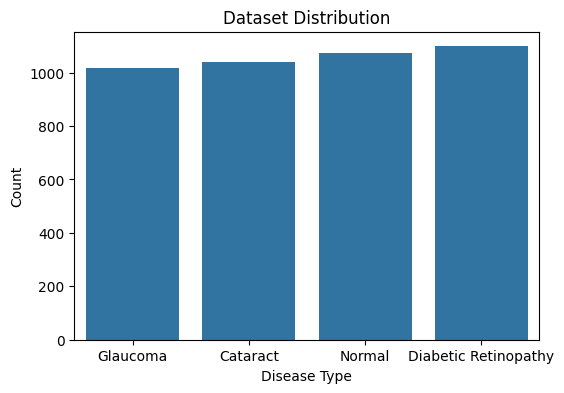

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
import os
from tqdm import tqdm

# Define dataset paths
glaucoma = Path('/content/drive/MyDrive/datasets/dataset/glaucoma')
cataract = Path('/content/drive/MyDrive/datasets/dataset/cataract')
normal = Path('/content/drive/MyDrive/datasets/dataset/normal')
diabetic_retinopathy = Path('/content/drive/MyDrive/datasets/dataset/diabetic_retinopathy')

# List of disease categories
disease_type = [glaucoma, cataract, normal, diabetic_retinopathy]
disease_labels = ["Glaucoma", "Cataract", "Normal", "Diabetic Retinopathy"]

# Create a DataFrame
df = pd.DataFrame()

# Read images and create DataFrame
for types in disease_type:
    for imagepath in tqdm(list(types.iterdir()), desc=str(types)):
        df = pd.concat([df, pd.DataFrame({'image': [str(imagepath)], 'disease_type': [disease_type.index(types)]})], ignore_index=True)

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# *Visualizing Class Distribution*
plt.figure(figsize=(6, 4))
sns.countplot(x=df["disease_type"])
plt.xticks(ticks=[0, 1, 2, 3], labels=disease_labels)
plt.xlabel("Disease Type")
plt.ylabel("Count")
plt.title("Dataset Distribution")
plt.show()